# Assignment – High Frequency Words

Group 4
- Santosh Cheruku
- Vinicio Haro
- Javern Wilson
- Saayed Alam

## Problem Statement 

1. Choose a corpus of interest.
2. How many total unique words are in the corpus? (Please feel free to define unique words in any interesting,
defensible way).
3. Taking the most common words, how many unique words represent half of the total words in the corpus?
4. Identify the 200 highest frequency words in this corpus.
5. Create a graph that shows the relative frequency of these 200 words.
6. Does the observed relative frequency of these words follow Zipf’s law? Explain.
7. In what ways do you think the frequency of the words in this corpus differ from “all words in all corpora.”

In [6]:
#Download required packages
import nltk, re, pprint
from nltk import word_tokenize
from nltk.corpus import stopwords
import urllib
import pandas as pd
import matplotlib.pyplot as plot
import string as str
from nltk.stem import PorterStemmer
%matplotlib inline

# 1. Choose a Corpus of Interest

Project Guttenberg is a site that allows you to read books directly from the HTML or as a standard txt file on the browser. Because of this, it is an ideal to use as a corpus because we do not need to download data locally. We can pull data directly from the URL thus making this work reproducible. 

For our corpus, we will be using the book BEALBY by H. G. Wells.

http://www.gutenberg.org/files/59769/59769-0.txt

In [8]:
url = "http://www.gutenberg.org/files/59769/59769-0.txt"

response = urllib.urlopen(url)

raw = response.read().decode('utf8')

## Data cleaning 

The raw text file contains the parts of the book that we do not want to use in our analysis. We do not want to use the publication page nor the chapters page. Thankfully we can impliment methodology to choose where and when to start reading the text into our notebook. 

We will also use the word_tokenize function to convert our raw text into a tokenized version.
https://kite.com/python/docs/nltk.tokenize.word_tokenize

In [9]:
starting_position = raw.find("CHAPTER I")

ending_position = raw.find("End of the Project Gutenberg EBook of Bealby; A Holiday, by H. G. Wells")

raw = raw[starting_position:ending_position]

Once we have converted the text into tokens, we want to look at the the number of words. In our case we have 83,914 tokenized words. Converting to tokens will make text operations much more efficient. It should be a data prep step when preparing raw data for some downstream analysis. 

## 2. How many total unique words are in the corpus? (Please feel free to define unique words in any interesting, defensible way).

Before we address the problem of unique words, we want to execute the best practice of cleaning the text data. One example why text should be cleaned is different tenses of the same word such as run and running. If we count them as unqie words, they would be counted as 2 but are they truly unique? No! They mean the same thing in different tenses. We accomplish this by removing the endings of words such as ing , ed, es, and so forth. 

Another text processing technique we want to use is to make every word lower case. Lets say we have the word "start" and somewhere else in the corpuse, we have "Start." By definition, both words are unique because they ae different but in reality, they are the same word except one starts with upper case and the other starts with lower case. 

We are also going to remove numbers from the raw text. This is a common practice. We do not want to count numbers as words. We can easily do this by applying simple regular expression. 

Some of the other corpus processing techniques will be to remove whitespace and remove stopwords. 

We want to define unique words as words that are not stem versions of other words nor common stopwords. 

Sources:
https://medium.com/@datamonsters/text-preprocessing-in-python-steps-tools-and-examples-bf025f872908

https://www.analyticsvidhya.com/blog/2018/02/the-different-methods-deal-text-data-predictive-python/

https://towardsdatascience.com/tfidf-for-piece-of-text-in-python-43feccaa74f8

In [10]:
raw_tok = word_tokenize(raw)

len(set(raw_tok))

9608

We have 9,608 lines without doing anything to the raw text file data. After we convert words to tokens, we will only take alpha numeric words and make all words lower case. 

In [11]:
words = [w for w in raw_tok if w.isalpha()] #alphanumeric

words = [w.lower() for w in words] #lowercase

In [12]:
len(set(words))

7686

In [13]:
ps = PorterStemmer() #stemming (remove endings)

stem = [ps.stem(w) for w in words]

stem = set(stem)

In [14]:
len(stem)

5450

After cleaning the text to some degree, we are able to count 5,450 unique words. 

# 3. Taking the most common words, how many unique words represent half of the total words in the corpus?

This is a great opportunity to apply stop word removal. 

In [15]:
stop_words = stopwords.words('english')

stem2=[w for w in stem if w not in stop_words]

Lets examine the most common words that represent half the total words in the corpus in two ways. Lets see how the counts look when we remove stop works and when we dont. Lets look at when we don't remove stop words first. 

In [16]:
fd = nltk.FreqDist(words)

top_words = fd.most_common(200)

i = 0

half_words = []

for w in top_words:
    
    if i >= len(raw_tok)/2:
        
        break
        
    else:
        
        i = i + w[1]
        
        half_words.append(w)
        
pd.DataFrame(half_words, columns = ['Words','Count']).head(10)



,Words,Count
0,the,3730
1,and,2473
2,a,2092
3,of,1943
4,he,1888
5,to,1655
6,was,1206
7,his,989
8,in,957
9,it,937


In [17]:
len(half_words)

166

This result is expected. Without removing any stop words, words such as the or and will appear freqently. 

In [18]:
fd = nltk.FreqDist(stem2)

top_words = fd.most_common(200)

i = 0

half_words = []

for w in top_words:
    
    if i >= len(raw_tok)/2:
        
        break
        
    else:
        
        i = i + w[1]
        
        half_words.append(w)
        
pd.DataFrame(half_words, columns = ['Words','Count']).head(10)



,Words,Count
0,fawn,1
1,buff,1
2,unobserv,1
3,blubber,1
4,child,1
5,knelt,1
6,unfurl,1
7,hitch,1
8,four,1
9,protest,1


In [19]:
len(half_words)

200

We get a much different picture when we consider removing the stems from common words in addition to the stop words. 166 unique words make half the corpus with stopwords and stems vs 200 unique words that make half the corpus without stems and stopwords. 

# 4. Identify the 200 highest frequency words in this corpus.

From part 3, we know that stop words are most likely going to be present in the top 200 words by frequency. We can verify this with the code below and see how it compares to the stop words and stems removed. 

In [20]:
fd = nltk.FreqDist(words)

top_words = fd.most_common(200)

print(pd.DataFrame(top_words, columns = ['Word', 'Count']).head(200))

           Word  Count
0           the   3730
1           and   2473
2             a   2092
3            of   1943
4            he   1888
5            to   1655
6           was   1206
7           his    989
8            in    957
9            it    937
10         that    836
11          had    661
12         with    606
13          you    570
14         said    557
15            i    546
16            s    544
17          for    496
18       bealby    476
19           at    434
20          him    416
21          she    402
22            t    374
23          but    372
24           as    340
25           on    336
26        there    332
27          not    321
28         then    305
29           be    303
..          ...    ...
170       right     53
171        such     53
172      should     53
173       never     53
174       under     53
175        even     52
176      thomas     52
177        felt     51
178        ever     50
179      laxton     50
180          mr     50
181  mogger

# 5. Create a graph that shows the relative frequency of these 200 words.

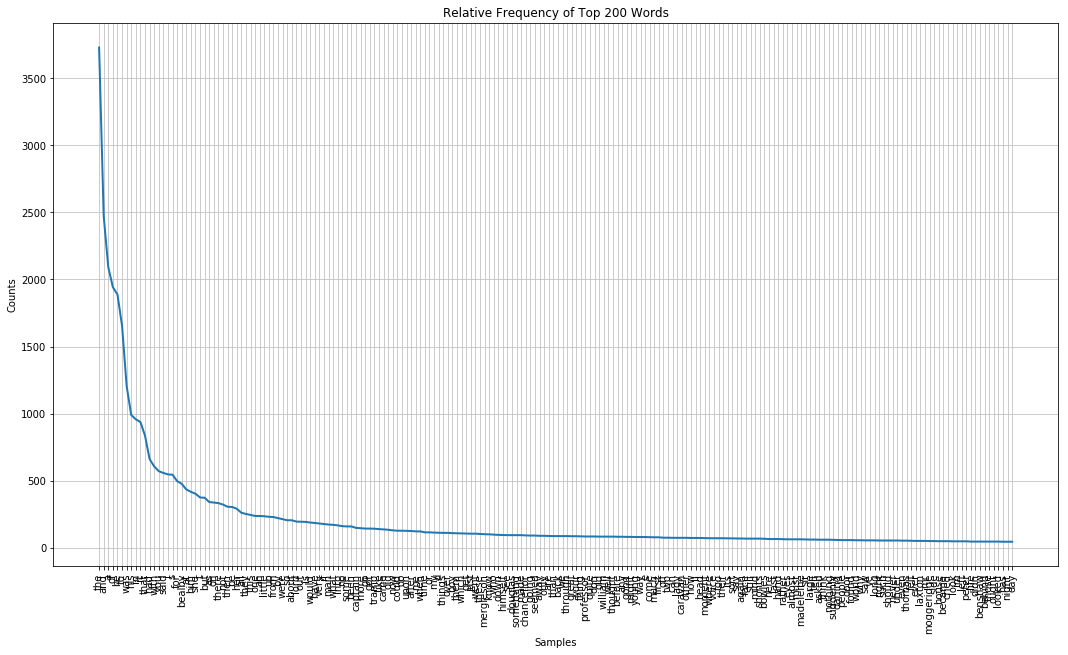

In [21]:
plot.figure(figsize=(18, 10))

plot.xticks(rotation=90)

plot.rc('xtick', labelsize=7) 

plot.title("Relative Frequency of Top 200 Words")

fd.plot(200)

The words are difficult to see so lets see a more drilled down version of perhaps the top 100 words. 

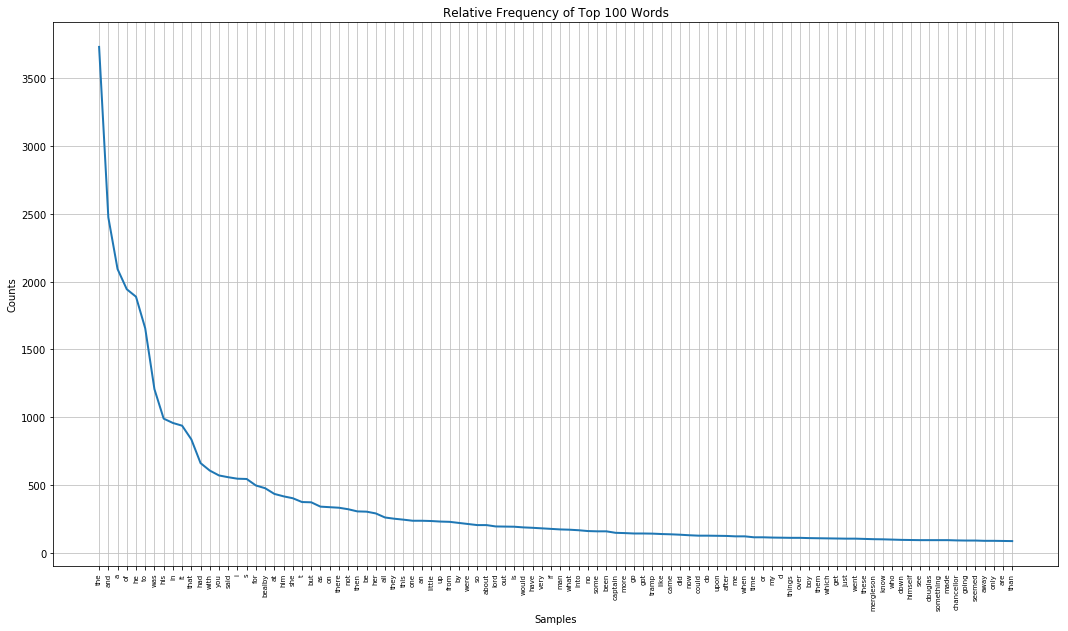

In [22]:
plot.figure(figsize=(18, 10))

plot.xticks(rotation=90)

plot.rc('xtick', labelsize=10) 

plot.title("Relative Frequency of Top 100 Words")

fd.plot(100)

# 6. Does the observed relative frequency of these words follow Zipf’s law? Explain.

Lets first understand what Zipf's law is. Zipf's law states that for any corpus in a natural language system, the word frequency has an inverse relationship to the rank in its frequency distribution. In our system, we see this law at play. Our frequency table shows a word such as "the" being the highest ranked. We also know from the law, generally if a word occurs n times,then the next word in the rank occurs n/2 times however as we can see in our frequency plots, this law does not generally apply directly but rather directionaly. 

# 7. In what ways do you think the frequency of the words in this corpus differ from “all words in all corpora.”

I believe that the frequency of words in this corpus, while not exactly matching zipf's law are going to have a very similar distribution. We can even make the hypothesis that the log scale will be close to linear not only in this corupus but all words in corpora. 